### Import the necessary package

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from itertools import chain, combinations
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import Normalizer

import warnings
warnings.filterwarnings("ignore")

### Import the Data

In [7]:

df = pd.read_csv("data_after_mice.csv",header=0,encoding='utf-8')
df

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,...,verification_status_Source Verified,verification_status_Verified,loan_status_Current,loan_status_Default,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days),issue_month,issue_year
0,0,7000.0,7000.0,7000.000000,0,6.62,214.93,0,48000.0,16.00,...,1,0,0,0,1,0,0,0,10,2011
1,1,7200.0,7200.0,7200.000000,0,12.42,240.59,9,35000.0,6.14,...,0,0,0,0,1,0,0,0,10,2011
2,2,22000.0,22000.0,22000.000000,0,14.65,758.88,1,192000.0,1.82,...,0,1,0,0,1,0,0,0,10,2011
3,3,18750.0,18750.0,18750.000000,0,7.90,586.70,3,75000.0,13.94,...,1,0,0,0,1,0,0,0,11,2011
4,4,12500.0,12500.0,12500.000000,0,7.90,391.13,3,32500.0,24.15,...,0,0,0,0,1,0,0,0,10,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,5995,30000.0,30000.0,27212.914318,1,19.29,783.02,6,38400.0,1.72,...,0,1,1,0,0,0,0,0,7,2011
5996,5996,2400.0,2400.0,2400.000000,0,15.23,83.47,2,21600.0,1.67,...,0,1,0,0,0,0,0,0,7,2011
5997,5997,2400.0,2400.0,2400.000000,0,18.39,87.24,10,38568.0,14.78,...,1,0,0,0,1,0,0,0,7,2011
5998,5998,7500.0,7500.0,7500.000000,0,5.99,228.14,0,51000.0,14.73,...,0,0,0,0,1,0,0,0,7,2011


### Drop unnecessary column

In [8]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

### List column names

In [9]:
list(df.columns)

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'emp_length',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'grade_B',
 'grade_C',
 'grade_D',
 'grade_E',
 'grade_F',
 'grade_G',
 'sub_grade_A2',
 'sub_grade_A3',
 'sub_grade_A4',
 'sub_grade_A5',
 'sub_grade_B1',
 'sub_grade_B2',
 'sub_grade_B3',
 'sub_grade_B4',
 'sub_grade_B5',
 'sub_grade_C1',
 'sub_grade_C2',
 'sub_grade_C3',
 'sub_grade_C4',
 'sub_grade_C5',
 'sub_grade_D1',
 'sub_grade_D2',
 'sub_grade_D3',
 'sub_grade_D4',
 'sub_grade_D5',
 'sub_grade_E1',
 'sub_grade_E2',
 'sub_grade_E3',
 'sub_grade_E4',
 'sub_grade_E5',
 'sub_grade_F1',
 'sub_grade_F2',
 'sub_grade_F3'

### Split the data in 2 dataframe 1 which needs to normalized

In [10]:
 
X = df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'installment', 'emp_length', 'annual_inc', 'issue_month', 'issue_year',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq']].values

In [11]:
z = df [['grade_B', 'grade_C',
       'grade_D', 'grade_E', 'grade_F', 'grade_G', 'sub_grade_A2',
       'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1',
       'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5',
       'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4',
       'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3',
       'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2',
       'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1',
       'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5',
       'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4',
               'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'loan_status_Current', 'loan_status_Default',
       'loan_status_Fully Paid',
       'loan_status_Late (31-120 days)','int_rate']]

In [12]:
z

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,...,sub_grade_G4,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,loan_status_Current,loan_status_Default,loan_status_Fully Paid,loan_status_Late (31-120 days),int_rate
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,6.62
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,12.42
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,14.65
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,7.90
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,7.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,19.29
5996,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,15.23
5997,0,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,18.39
5998,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,5.99


### Normalise the data

In [13]:

scaler = Normalizer().fit(X)


In [14]:
normalizedX = scaler.transform(X)



### Summarize transformed data

In [15]:
np.set_printoptions(precision=3)
print(normalizedX[0:5,:])

[[1.253e-01 1.253e-01 1.253e-01 0.000e+00 3.847e-03 0.000e+00 8.591e-01
  1.790e-04 3.599e-02 2.864e-04 0.000e+00 0.000e+00 2.506e-04 0.000e+00
  3.991e-01 1.448e-03 4.474e-04 0.000e+00 0.000e+00 1.385e-01 1.385e-01
  1.253e-01 1.317e-02 0.000e+00 0.000e+00 0.000e+00 4.006e-03 0.000e+00
  0.000e+00]
 [1.784e-01 1.784e-01 1.784e-01 0.000e+00 5.962e-03 2.230e-04 8.673e-01
  2.478e-04 4.983e-02 1.522e-04 0.000e+00 0.000e+00 1.487e-04 0.000e+00
  1.549e-01 2.213e-03 3.222e-04 0.000e+00 0.000e+00 2.151e-01 2.151e-01
  1.784e-01 3.632e-02 3.715e-04 0.000e+00 0.000e+00 2.186e-04 0.000e+00
  0.000e+00]
 [1.095e-01 1.095e-01 1.095e-01 0.000e+00 3.779e-03 4.979e-06 9.560e-01
  4.979e-05 1.001e-02 9.062e-06 0.000e+00 4.979e-06 3.983e-05 0.000e+00
  1.035e-01 3.276e-04 4.979e-05 0.000e+00 0.000e+00 1.166e-01 1.166e-01
  1.095e-01 7.009e-03 0.000e+00 0.000e+00 0.000e+00 4.280e-03 0.000e+00
  0.000e+00]
 [1.985e-01 1.985e-01 1.985e-01 0.000e+00 6.211e-03 3.176e-05 7.939e-01
  1.164e-04 2.129e-02 1.4

### Put Normalized data in dataframe df1

In [16]:
df1 = pd.DataFrame(normalizedX)


In [17]:
df1.columns = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'installment', 'emp_length', 'annual_inc', 'issue_month', 'issue_year',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq']

### Put normalized and non-normalized data in their respective csv files

In [18]:
df1.to_csv('normalized.csv')

In [19]:
z.to_csv('non_normalized_data.csv')

### Read data from data_after_mice csv

In [20]:
df2 = pd.read_csv("data_after_mice.csv",header=0,encoding='utf-8')

### Split df2 into training and testing datasets

In [21]:
size = df2.shape[0]

rs = 1

Train, Test = train_test_split(df2, test_size= 0.3, random_state= rs)


### Split Test data set further into CV and Test datasets

In [22]:


CV, Test = train_test_split(Test, test_size=0.5, random_state = rs)

print(Train.shape, CV.shape, Test.shape)

(4200, 81) (900, 81) (900, 81)


## Calculating the correlation with interest rate after normalization

Text(0.5, 0, 'Correlation with int_rate')

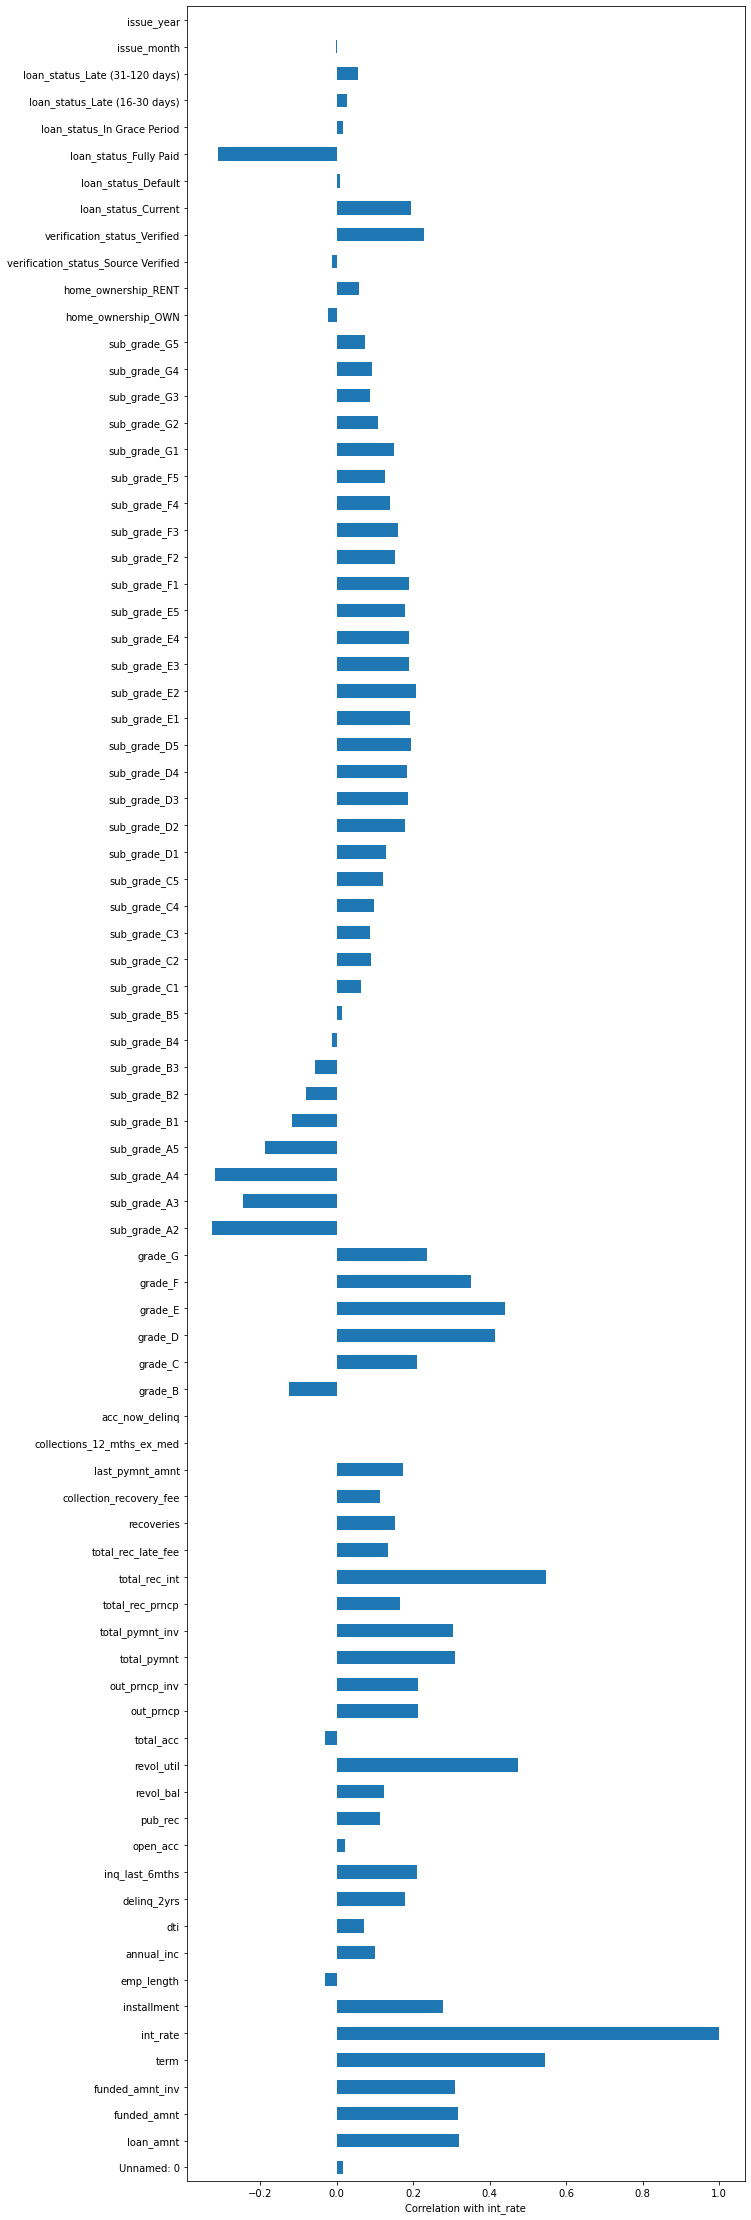

In [24]:
ax = Train.corr()['int_rate'].plot(kind = "barh",figsize = (10,40))
ax.set_xlabel('Correlation with int_rate')

## Visualisation of distribution of data in box plot

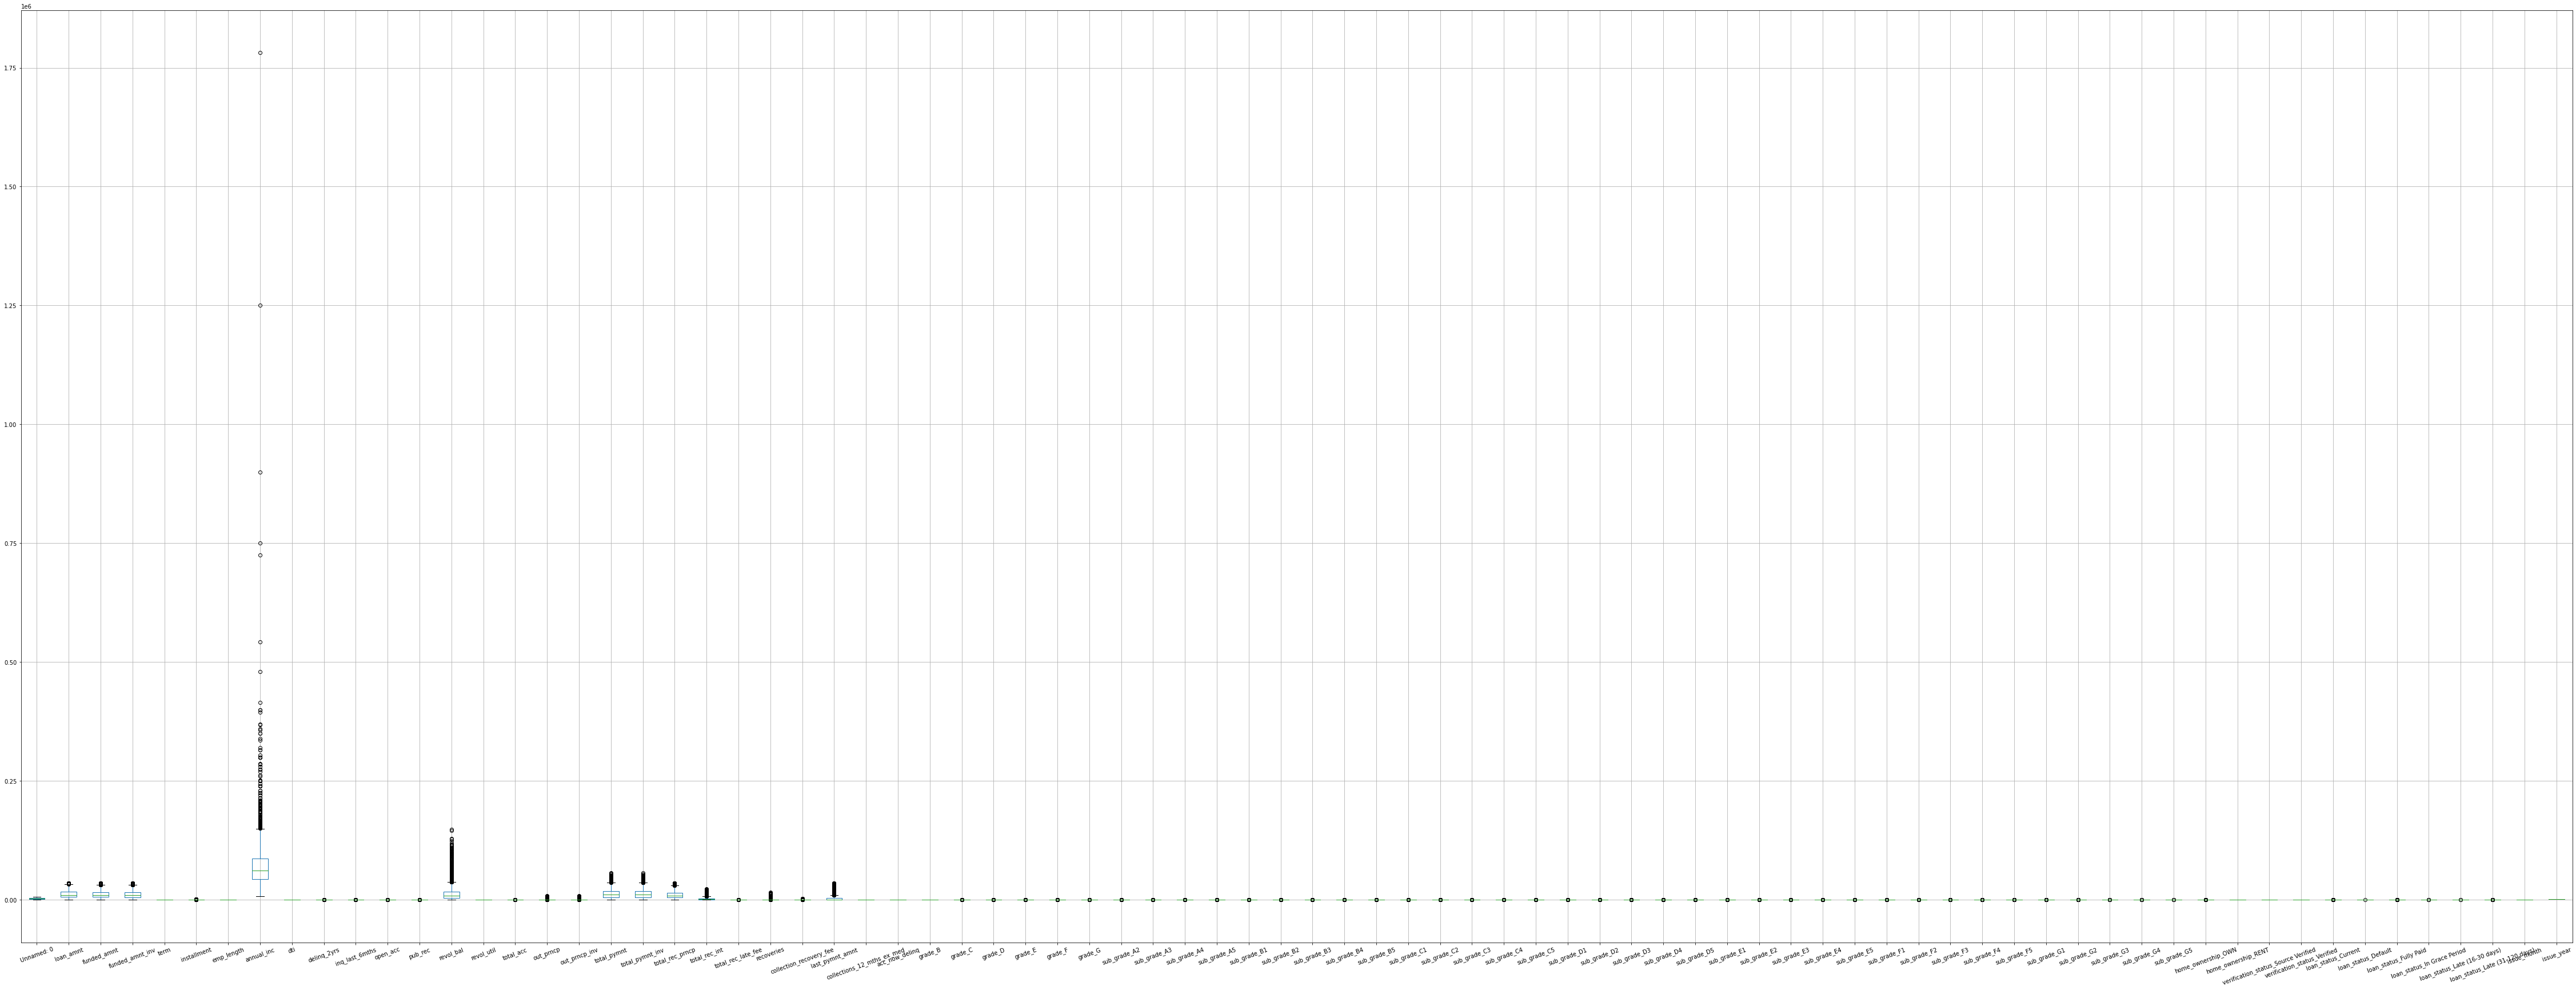

In [25]:
ax = Train.drop(["int_rate"], axis = 1).boxplot(figsize=(80,30),rot=20)